In [96]:
import pandas as pd

# Cambia la ruta del archivo a la correcta según tu explorador de archivos
file_path = r'C:\Users\Usuario\Downloads\archive\netflix_data - netflix_data.csv'
df = pd.read_csv(file_path)

In [98]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8810 entries, 0 to 8809
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8810 non-null   object
 1   type          8810 non-null   object
 2   title         8810 non-null   object
 3   director      6176 non-null   object
 4   cast          7985 non-null   object
 5   country       8805 non-null   object
 6   date_added    8800 non-null   object
 7   release_year  8810 non-null   int64 
 8   rating        8810 non-null   object
 9   duration      8810 non-null   object
 10  listed_in     8810 non-null   object
 11  description   8810 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.1+ KB


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3180\3537998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['duration_range'] = pd.cut(df_filtered['duration'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3180\3537998.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_by_year = df_filtered.groupby(['release_year', 'duration_range']).size().unstack(fill_value=0)


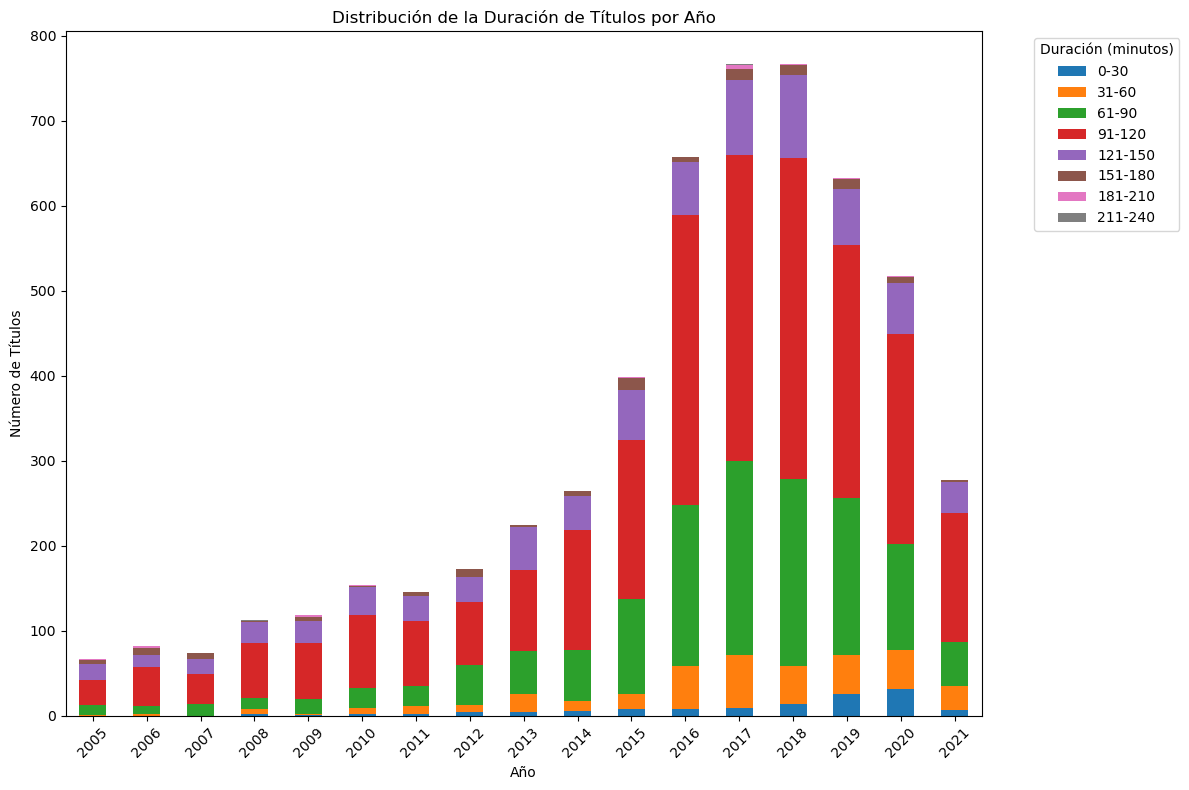

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

#formato correcto y manejo de errors
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# elimino nulls
df = df.dropna(subset=['duration'])
df_filtered = df[df['release_year'] >= 2005]

# defino intervalos en base a la duracion en minutos con su etiquetas. Uso bins porque utilizò cut para definir intervalos.
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240']
df_filtered['duration_range'] = pd.cut(df_filtered['duration'], bins=bins, labels=labels, include_lowest=True)

# agrupo por año y duraciòn
duration_by_year = df_filtered.groupby(['release_year', 'duration_range']).size().unstack(fill_value=0)

# visulizaciòn de grafico
duration_by_year.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Distribución de la Duración de Títulos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Títulos')
plt.legend(title='Duración (minutos)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3180\2368812499.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration', y='genre', data=average_duration_by_genre, palette='colorblind')


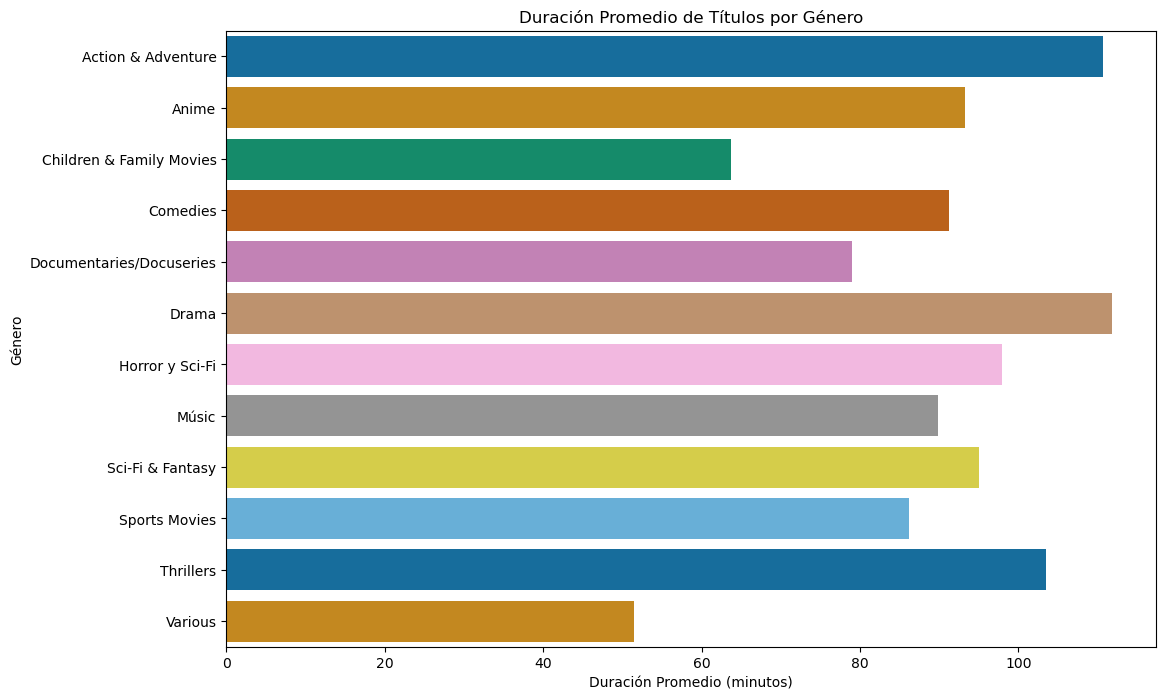

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# hago el case que traigo desde el campo calculado en looker studio, con los generos filtrados.
def genre_classify(listed_in):
    if 'Dramas' in listed_in and 'International Movies' in listed_in:
        return 'Drama'
    elif 'Comedies' in listed_in and 'International Movies' in listed_in:
        return 'Comedies'
    elif 'Action & Adventure' in listed_in and 'International Movies' in listed_in:
        return 'Action & Adventure'
    elif 'Horror' in listed_in and 'Sci-Fi & Fantasy' in listed_in:
        return 'Horror y Sci-Fi'
    elif 'Horror' in listed_in:
        return 'Horror y Sci-Fi'
    elif 'Anime' in listed_in:
        return 'Anime'
    elif 'Horror' in listed_in and 'International Movies' in listed_in:
        return 'Horror y Sci-Fi'
    elif "Kids' TV" in listed_in:
        return 'Children & Family Movies'
    elif 'Action & Adventure' in listed_in:
        return 'Action & Adventure'
    elif 'Dramas' in listed_in or 'Romantic Movies' in listed_in:
        return 'Drama'
    elif 'Music & Musicals' in listed_in:
        return 'Músic'
    elif 'Sci-Fi & Fantasy' in listed_in:
        return 'Sci-Fi & Fantasy'
    elif 'Sports Movies' in listed_in:
        return 'Sports Movies'
    elif 'Docuseries' in listed_in or 'Documentaries' in listed_in:
        return 'Documentaries/Docuseries'
    elif 'Thrillers' in listed_in:
        return 'Thrillers'
    elif 'Stand-Up Comedy' in listed_in or 'Comedies' in listed_in or 'Reality TV' in listed_in:
        return 'Comedies'
    elif 'Children & Family Movies' in listed_in and 'Comedies' in listed_in:
        return 'Children & Family Movies'
    elif 'Children & Family Movies' in listed_in:
        return 'Children & Family Movies'
    else:
        return 'Various'

#creo la columna
df['genre'] = df['listed_in'].apply(genre_classify)

# calculo el promedio
average_duration_by_genre = df.groupby('genre')['duration'].mean().reset_index()

# visualizaciòn de grafico
plt.figure(figsize=(12, 8))
sns.barplot(x='duration', y='genre', data=average_duration_by_genre, palette='colorblind')
plt.title('Duración Promedio de Títulos por Género')
plt.xlabel('Duración Promedio (minutos)')
plt.ylabel('Género')
plt.show()


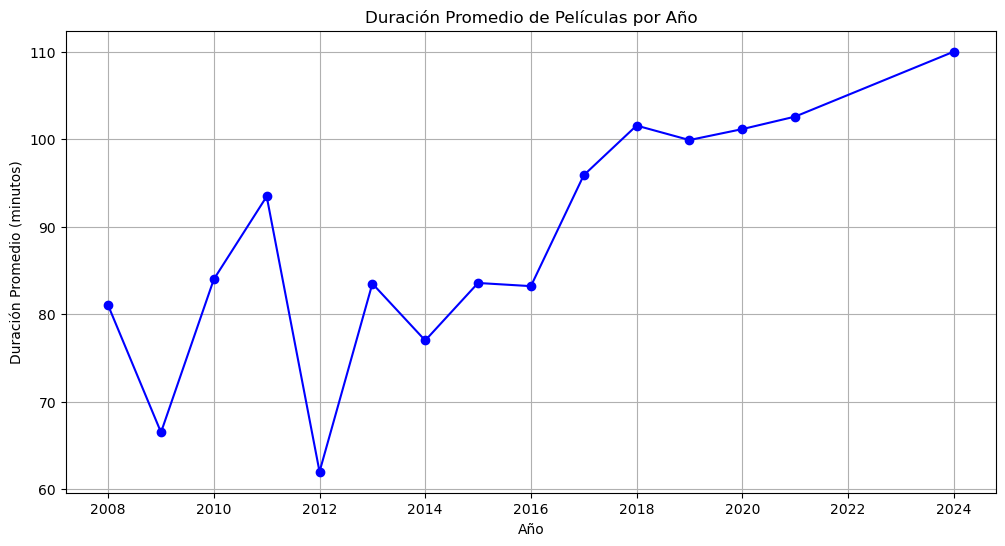

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# filtro solamente las movies a partir del 2000
movies_df = df[(df['type'] == 'Movie') & (df['year_added'] >= 2000)].copy()

# hago el codigo para la columna duration, ya que no tiene el formato integramente como int o numerico.
def duration_convert(duration):
    try:
        if isinstance(duration, str):
            return float(duration.replace(' min', ''))
        elif isinstance(duration, (int, float)):
            return float(duration)
        else:
            return None
    except:
        return None

#aplico las conversiones en el caso de que sea necesario y dsp creo los grupos por año
movies_df['duration'] = movies_df['duration'].apply(duration_convert)
movies_avg_duration = movies_df.groupby('year_added')['duration'].mean()

# visualizacion del promedio de peliculas por año
plt.figure(figsize=(12, 6))
plt.plot(movies_avg_duration.index, movies_avg_duration.values, marker='o', color='blue')
plt.title('Duración Promedio de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Duración Promedio (minutos)')
plt.grid(True)
plt.show()

